## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [563]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [564]:
df = pd.read_csv('students-data.csv', delimiter=';',engine='python')
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [565]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [566]:
df['number']=df.index
df.set_index('number', inplace=True)
df.dropna()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19


In [567]:
df.shape


(395, 33)

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [568]:
df.dtypes


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [569]:
# select all columns having float datatype 
df=df.select_dtypes(include ='int64')
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [570]:
for column in df.select_dtypes(include = ['int64']).columns:
    if np.var(df[column]) < 1:
        df.drop([column],axis=1,inplace=True)
        


D:\anakonda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [571]:
df.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10


In [572]:
df.shape

(395, 10)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [573]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
student_df_encoded = df.apply(le.fit_transform)

student_df_encoded


,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,
0,3,4,4,3,0,2,6,2,3,3
1,2,1,1,2,0,2,4,2,2,3
2,0,1,1,1,2,2,10,4,5,7
3,0,4,2,1,0,4,2,12,11,12
4,1,3,3,1,1,4,4,3,7,7
5,1,4,3,1,1,4,10,12,12,12
6,1,2,2,3,0,2,0,9,9,8
7,2,4,4,3,0,0,6,3,2,3
8,0,3,2,1,0,0,0,13,15,16


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [574]:
student_df_encoded['G1'] = np.where(student_df_encoded['G1']>=10, 1, 0)
student_df_encoded['G2'] = np.where(student_df_encoded['G2']>=10, 1, 0)
student_df_encoded['G3'] = np.where(student_df_encoded['G3']>=10, 1, 0)
student_df_encoded.head() 

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,
0,3,4,4,3,0,2,6,0,0,0
1,2,1,1,2,0,2,4,0,0,0
2,0,1,1,1,2,2,10,0,0,0
3,0,4,2,1,0,4,2,1,1,1
4,1,3,3,1,1,4,4,0,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [575]:
import numpy as np
array= student_df_encoded.values
X = np.array(student_df_encoded.iloc[:, :26])
Y = np.array(student_df_encoded['G3'])



## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

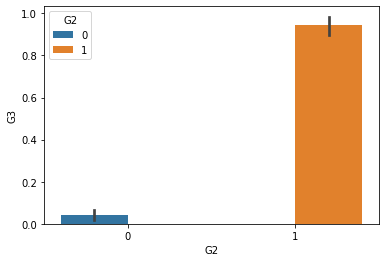

In [576]:
import seaborn as sns
sns.barplot(student_df_encoded['G2'], student_df_encoded['G3'], hue= student_df_encoded['G2'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [579]:
sns.countplot(student_df_encoded['school'])

KeyError: 'school'

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [580]:
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=7)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [581]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy is:", model_score)
print("F1_score is", metrics.f1_score(y_test, y_predict))

print("confusion metrics is", metrics.confusion_matrix(y_test, y_predict))



D:\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is: 1.0
F1_score is 1.0
confusion metrics is [[47  0]
 [ 0 32]]


# Naive bayes with Iris data

### Import Iris.csv

In [475]:
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
from sklearn.naive_bayes import GaussianNB

In [476]:
df = pd.read_csv("Iris.csv")
df.columns =df.columns.str.strip().str.lower().str.replace(' ','').str.replace('(','').str.replace(')','')
df


,sepallengthincm,sepalwidthincm,petallengthincm,petalwidthincm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [477]:
df.shape

(150, 5)

In [478]:
df.dtypes


sepallengthincm    float64
sepalwidthincm     float64
petallengthincm    float64
petalwidthincm     float64
class               object
dtype: object

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [479]:
X = df.drop(['class'],axis=1)  ## here in iris dataset Class is a dependent variable 
y = df[['class']] ## rest of the columns are independent variable 

### Find the distribution of target variable (Class)

In [480]:
df.groupby(['class']).count()

,sepallengthincm,sepalwidthincm,petallengthincm,petalwidthincm
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

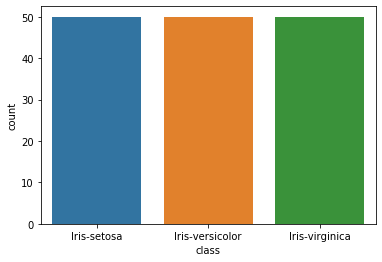

In [481]:
sns.countplot(x='class',data=df)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

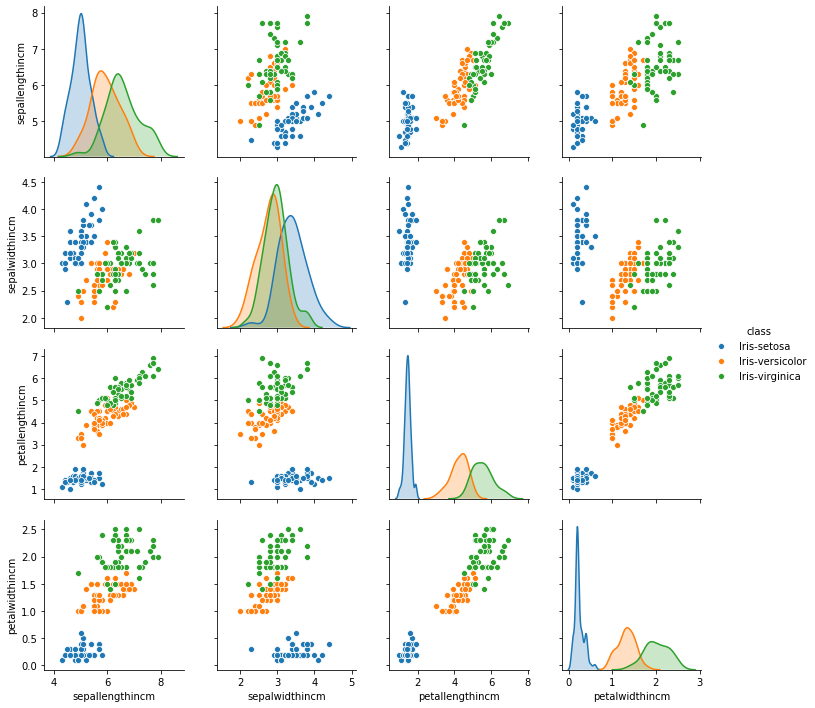

In [482]:
df=sns.pairplot(df,hue='class')
df

In [483]:
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

### Summary Statistics and explain insights for at least 2 variables

1. Sepal Length (in cm) is highly corilatable with all classes where  iris-setosa which contains widly disributed value.
2. Petapetalwidth and petal length can be superble easyly to one an each other for all classes with high acuurecy to determain the class visually 
3. In petal width in cm iris setosa can be superable from iris vrsicolor and iris-vriginica


### Correlation among all variables and give your insights

1. Sepal with is having higly corelation with all classes distribution is opverlapped so its pridiction level is low. 
2. Distribution of petal lenth of iris setosa is not overlapping with other classes so it can be easyly identified.

### Split data in Training and Validation in 80:20

In [484]:
# Create the training and test data set in the ratio of 80:20 respectively

test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [485]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 126 to 25
Data columns (total 4 columns):
sepallengthincm    120 non-null float64
sepalwidthincm     120 non-null float64
petallengthincm    120 non-null float64
petalwidthincm     120 non-null float64
dtypes: float64(4)
memory usage: 4.7 KB


### Do Feature Scaling

In [486]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

### Train and Fit NaiveBayes Model

In [487]:
model = GaussianNB()
model.fit(X_train, y_train)

D:\anakonda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [488]:
 from sklearn.metrics import f1_score

### Print Accuracy and Confusion Matrix and Conclude your findings

In [489]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("f1_score macro is ",f1_score(expected,predicted, average='macro')) 
print("f1_score micro is ",f1_score(expected, predicted,average='micro'))  
print("f1_score weighted is ",f1_score(expected,predicted,average='weighted'))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30

[[7 0 0]
 [0 9 3]
 [0 2 9]]
f1_score macro is  0.8550724637681159
f1_score micro is  0.8333333333333334
f1_score weighted is  0.8333333333333334
